## 1.3 Prerequisites
Every participant to the course is expected to come with a Jupyter notebook, or similar, which computes the temporal evolution of a quantity T described by the ordinary differential equation:
$$ ̇\dot{T} = − λ T $$
where the Leibnitz dot notation denotes differentiation with respect to time, and $λ = 1 × 10^{−6}s^{−1}$ is held constant. Ideally a numerical solution formed by time-stepping the evolution of T should be compared to the analytic solution (exponential decay), and a solution using an ODE solver, given the initial condition, $T(0) = 1$.

In [9]:
import numpy as np
import sympy as sym

t = sym.Symbol('t')
l = sym.Symbol('lamda')
T = sym.Function('T')(t)
ics = {T.subs(t,0):1}
l_v  = sym.Eq(l, 1e-6) # this does not work? how do i specify units?
ode = sym.Eq(T.diff(t), -l*T)
ics      = {T.subs(t,0):1}
settings = {l:1e-6}
T  = sym.dsolve(ode, ics=ics)
if not T.subs(t,0).rhs == 1: print('ics not confirmed')

def func_ode(x,lam=1e-6):
    global T
    # t, l = sym.symbols('t lambda')
    # l = sym.Symbol('lamda')
    return float(T.subs({l:lam}).subs({t:x}).rhs)

def func_ana(x,lam=1e-6):
    return  np.e ** (-lam * x) 
    
def func_num(x,lam=1e-6, initcon = (0,1.0), stepsize=1):
    direction = 1 if x >= initcon[0] else -1 # moving forward or backward
    value = initcon[1]
    for i in range(initcon[0],x, direction * stepsize):
        value = value + value * (-lam) * direction
    return value



In [10]:
for i in range(-1000,1000,100):
    print(i, func_ode(i), func_ana(i), func_num(i))

-1000 1.0010005001667084 1.0010005001667084 1.0010004996662079
-900 1.0009004051215273 1.0009004051215273 1.0009004046711227
-800 1.0008003200853504 1.0008003200853504 1.000800319685031
-700 1.0007002450571767 1.0007002450571767 1.0007002447069329
-600 1.0006001800360054 1.0006001800360054 1.0006001797358268
-500 1.0005001250208359 1.0005001250208359 1.000500124770711
-400 1.0004000800106678 1.0004000800106678 1.0004000798105872
-300 1.0003000450045003 1.0003000450045003 1.0003000448544548
-200 1.0002000200013335 1.0002000200013335 1.0002000199013132
-100 1.0001000050001667 1.0001000050001667 1.0001000049501616
0 1.0 1.0 1.0
100 0.9999000049998333 0.9999000049998333 0.9999000049498383
200 0.9998000199986667 0.9998000199986667 0.9998000198986868
300 0.9997000449955004 0.9997000449955004 0.9997000448455456
400 0.9996000799893344 0.9996000799893344 0.999600079789415
500 0.9995001249791693 0.9995001249791693 0.9995001247292946
600 0.9994001799640054 0.9994001799640054 0.9994001796641859
70

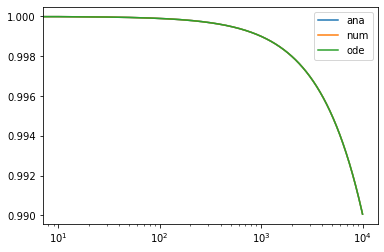

In [11]:
import matplotlib.pyplot as plt

x,ana,num,ode = [],[],[],[]
n=10000
for i in range(0,n,int(n/1000)):
    x.append(i)
    ana.append(func_ana(i))
    num.append(func_num(i))
    ode.append(func_ode(i))
    
fig, ax = plt.subplots()
ax.plot(x,ana, label='ana')
ax.plot(x,num, label='num')
ax.plot(x,ode, label='ode')
ax.legend()
ax.set_xscale('log', base=10)